In [54]:
import numpy as np
from gensim.models import word2vec
import matplotlib.pyplot as plt
%matplotlib inline

## 词向量可视化

In [55]:
model = word2vec.Word2Vec.load('../cache/w2v_cbow')
# model = word2vec.Word2Vec.load('../cache/w2v_skip')
# model1 = word2vec.KeyedVectors.load_word2vec_format("../cache/w2v_cbow_format", binary=True)

In [56]:
count = 10000
word_vectors_matrix = np.ndarray(shape=(count, 300), dtype='float32')
word_list = []
i = 0
for word in model.wv.vocab:
    word_vectors_matrix[i] = model[word]
    word_list.append(word)
    i += 1
    if i == count:
        break
print("word_vectors_matrix shape is: ", word_vectors_matrix.shape)

D:\ProgramAPP\python\anaconda\lib\site-packages\ipykernel\__main__.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


word_vectors_matrix shape is:  (10000, 300)


In [57]:
%time
import sklearn.manifold as ts
tsne = ts.TSNE(n_components=2, random_state=0)
word_vectors_matrix_2d = tsne.fit_transform(word_vectors_matrix)
print("word_vectors_matrix_2d shape is: ", word_vectors_matrix_2d.shape)

Wall time: 0 ns
word_vectors_matrix_2d shape is:  (10000, 2)


In [58]:
import pandas as pd
points = pd.DataFrame([(word, coords[0], coords[1]) for word, coords in [(word, word_vectors_matrix_2d[word_list.index(word)]) for word in word_list] ], columns=["word", "x", "y"])
print("Points DataFrame built")
print(points.head(10))

Points DataFrame built
      word          x          y
0        　  35.968571 -27.188988
1       宁夏  51.375587   4.060314
2       食品  47.411263  -3.912474
3  药品监督管理局 -59.579361  -4.300385
4     2017  14.302612  68.175690
5        年 -10.886168  67.247650
6     食品安全 -18.728111  -4.114270
7       监督  35.426834 -26.985252
8       抽检  36.181385 -28.582870
9        （  20.626284  59.610710


In [59]:
#DataFrame来绘制我们的单词向量
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体：解决plot不能显示中文问题,否则会显示成方块
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

In [66]:
def plot_region(x_bounds, y_bounds):
    slices = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) &
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
        ]
    ax = slices.plot.scatter("x", "y", s=10, figsize=(15, 12))
    for  i, point in slices.iterrows():
        ax.text(point.x + 0.05, point.y + 0.05, point.word, fontsize=18) # text可以将文本绘制在图表指定坐标(x,y)

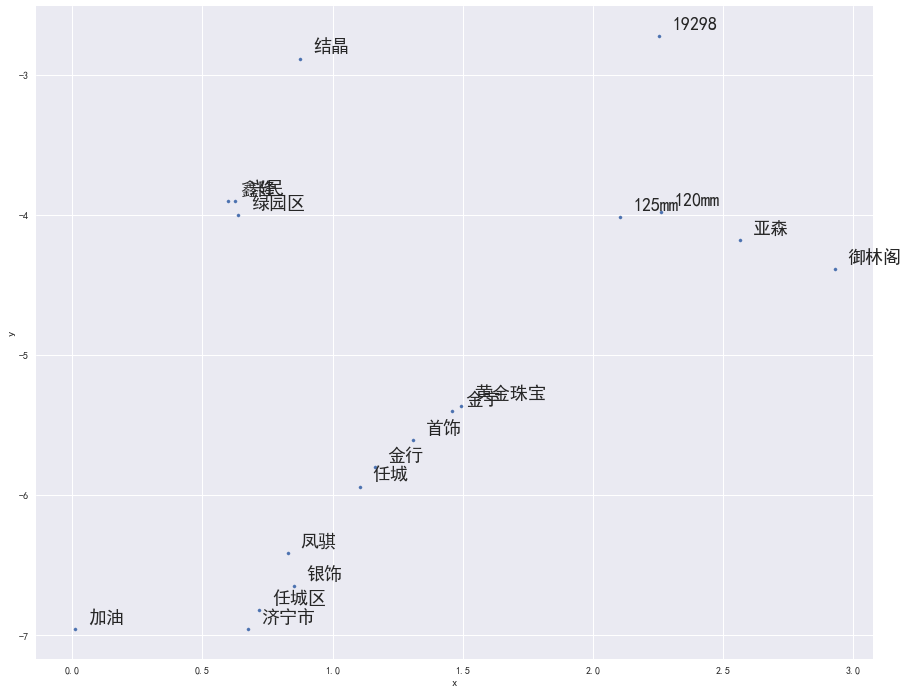

In [67]:
plot_region(x_bounds=(0, 3), y_bounds=(-7.5, -2.5))
plt.show()